In [1]:
import numpy as np
np.set_printoptions(precision=5)
import matplotlib.pyplot as plt
%matplotlib inline

/opt/anaconda/lib/python3.6/site-packages/matplotlib/font_manager.py:280: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


# za seminar: 
* primer: 
    * npr. graf pomirjenih točk povesa nosilca - interpoliramo, integriramo
    * dif enačba - hitrost avta, zapelje na most - reakcije v podporah (navežemo naloge eno na drugo če ni vse v eni nalogi)
* zakaj smo izbrali to metodo - primerjamo z ostalimi, razlika v rezultatu -> na koncu naloge 
* dodatne vsebine:
    * izviren primer - dodatne točke (nosilci ne!)
    * naše funkcije shranjene v modulu in importane
    * animacije, uporabniški umesnik
    
    
* **NE** za vsako nalogo svoj primer!!!

* v pypinm - mapa orodja - profesorjeva koda moduli -> če uporabiš - komentar kaj se zgodi, prednosti, slabosti...

# LU razcep

* primer nosilca: sistem enačb, če spreminjamo kote sil -> spremenijo se desne strani enačb, leva ostane enaka
* pri velikih sistemih - gaussova eliminacija traja nekaj časa - hitrejše z LU razcepom (se malo spreminja sistem - samo desna stran)


* A = LU , L spodnje trikotna, U zgornje trikotna
* **naprej na listu vaj zadaj...**

# Naloge
spomnimo se Gaussove eliminacije od zadnič...

In [14]:
def gauss_eliminacija(A, b):
    
    Ab = np.column_stack((A, b))
    n = len(b)
    
    for i in range(0, n-1):
        for j in range(i+1, n):
            lam = Ab[j, i]/Ab[i, i]
            Ab[j] -= Ab[i]*lam
    return Ab   

v prof. predavanjih -> enumerate - vrača indeks in vrstice (namesto samo vrstic)

In [16]:
def gauss_resitev(Ab):
    A = Ab.copy()[:, :-1]
    b = Ab.copy()[:, -1]
    n = Ab.shape[0]
    x = np.zeros(n)
    
    for i in range(n-1, -1, -1):
        x[i] = (b[i] - np.dot(A[i, i+1:], x[i+1:])) / A[i, i]
        
    return x

In [12]:
def LU_razcep(A):
    
    LU = A.copy()
    
    for p, pivot_vrstica in enumerate(LU[:-1]):
        for vrsta in LU[p+1:]:
            if vrsta[p]:
                m= vrsta[p]/pivot_vrsta[p]
                vrsta[p:] = vrsta[p:] - pivot_vrsta[p:] * m
                vrsta[p] = m
    return LU

In [13]:
def LU_resitev(LU, b):
    n = LU.shape[0]
    x = np.zeros(n)
    y = np.zeros(n)
    
    #direktno vstavljanje, rešujemo: Ly = b
    for i in range(n):
        y[i] = (b[i] - np.dot(y[:i], LU[i, :i])) #vsi y pred tistim, ki ga računamo -> pred diagonalo Lja = do i-ja -> diagonale so enke - z ničemer ne delimo! 
    
    #obratno vstavljanje
    for i in range(n-1, -1, -1):
        x[i] = (y[i] - np.dot(LU[i, i+1:], x[i+1:])) / LU[i, i]
        
    return x

In [24]:
l = 1.5 #m
a = 0.55 #m
F = 85 #N
seznam_phi = [0, np.pi/4]

In [25]:
A = np.array([[1, 0, 0], [0, 1, 1], [0, 0, l]])

LU = LU_razcep(A)

for i in  seznam_phi:
    b = np.array([F*np.cos(i), F*np.sin(i), F*a*np.sin(i)])
    x = LU_resitev(LU, b)
    print(x)

[ 85.   0.   0.]
[ 60.10408  38.06592  22.03816]


# Pivotiranje
* zamenjava vrstic med sabo
* na diagonali ne želimo 0 -> nedefinirano, ali blizu nič -> slabo pogojen sistem
* abs(Aii) > sum(abs(Aij)) - idealno

napredno rezanje:
Ab[[p], :], Ab[[p_,max], :] = Ab[[p_max], :], Ab[[p], :] -> oglati oklepaji kopirajo vrstice in zamenjajo!

In [40]:
def gauss_eliminacija_pivotiranje(A, b):
    Ab = np.column_stack((A, b))
        
    for p, pivot_vrstica in enumerate(Ab[:-1]):
        p_max = np.argmax(np.abs(Ab[p:, p])) + p #brez +p najde največji element v opazovanem seznamu -> glej na listu spodaj zraven grafa! 
        if p != p_max:
            Ab[[p], :], Ab[[p_max], :] = Ab[[p_max], :], Ab[[p], :]
            pivot_vrsta = Ab[p]
        
        for vrsta in Ab[p+1:]:
            if vrsta[p]: #če element v stolpcu p v trenutni vrstici - če je že nič = false
                m= vrsta[p]/pivot_vrsta[p]
                vrsta[p:] = vrsta[p:] - pivot_vrsta[p:] * m
    return Ab   

In [27]:
l = 1 #m
M_A = 9.5 # Nm
A_y = 12 #N
alpha = np.pi/4 #rad

In [30]:
A = np.array([[0, np.cos(alpha), 1],
             [0, np.sin(alpha), 0],
             [1, np.sin(alpha)*l, 0]])
A #težava matrike = nule v prvi vrstici -rabimo pivotiranje

array([[ 0.     ,  0.70711,  1.     ],
       [ 0.     ,  0.70711,  0.     ],
       [ 1.     ,  0.70711,  0.     ]])

In [31]:
b = np.array([0, A_y, M_A])
b

array([  0. ,  12. ,   9.5])

In [32]:
gauss_eliminacija(A, b) #negre ker so ničle!

/opt/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in double_scalars
  
/opt/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in double_scalars
  
/opt/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in multiply
  if __name__ == '__main__':


array([[ 0.     ,  0.70711,  1.     ,  0.     ],
       [     nan,      nan,      nan,      nan],
       [     nan,      nan,      nan,      nan]])

In [36]:
Ab = gauss_eliminacija_pivotiranje(A, b) #je pivotirana
Ab

array([[  1.     ,   0.70711,   0.     ,   9.5    ],
       [  0.     ,   0.70711,   1.     ,   0.     ],
       [  0.     ,   0.     ,  -1.     ,  12.     ]])

In [37]:
gauss_resitev(Ab)

array([ -2.5    ,  16.97056, -12.     ])

In [39]:
np.linalg.solve(A, b) #smo vredu sprogramirali!

array([ -2.5    ,  16.97056, -12.     ])

# LU razcep z pivotiranjem
* končna koda v prof. predavanjih
* LU razcep = pivotiranje samo A - moramo shraniti še spremembo vrstic -> da spremenimo tudi b v gauss_resitev

# LU razcep, Gaussova eliminacija v scipy
* LU_razcep(A) == scipy.linalg.lu_factor(A)
* LU_resitev(A) == scipy.linalg.lu_solve(A)

In [41]:
A

array([[ 0.     ,  0.70711,  1.     ],
       [ 0.     ,  0.70711,  0.     ],
       [ 1.     ,  0.70711,  0.     ]])

In [42]:
b

array([  0. ,  12. ,   9.5])

In [45]:
from scipy.linalg import lu, lu_factor, lu_solve

In [44]:
LU, pivot = lu_factor(A)
x = lu_solve((LU, pivot), b)
x

array([ -2.5    ,  16.97056, -12.     ])

In [46]:
gauss_eliminacija_pivotiranje(A, b)

array([[  1.     ,   0.70711,   0.     ,   9.5    ],
       [  0.     ,   0.70711,   1.     ,   0.     ],
       [  0.     ,   0.     ,  -1.     ,  12.     ]])

In [50]:
perm, L, U = lu(A)
print(L)
print(U) #gaussova eliminacija
perm #vrstni red vrstic po pivotiranju

[[ 1.  0.  0.]
 [ 0.  1.  0.]
 [ 0.  1.  1.]]
[[ 1.       0.70711  0.     ]
 [ 0.       0.70711  1.     ]
 [ 0.       0.      -1.     ]]


array([[ 0.,  1.,  0.],
       [ 0.,  0.,  1.],
       [ 1.,  0.,  0.]])

# Računaje inverza matrike

In [52]:
np.linalg.inv(A) #mi rabimo samo to znat - na teoriji klv - tudi izpeljavo

array([[ 0.     , -1.     ,  1.     ],
       [ 0.     ,  1.41421,  0.     ],
       [ 1.     , -1.     ,  0.     ]])

# Reševanje predoločenih sistemov - PSEVDO INVERZ
* A⁺ = (A.T \* A)^(-1) \* A.T

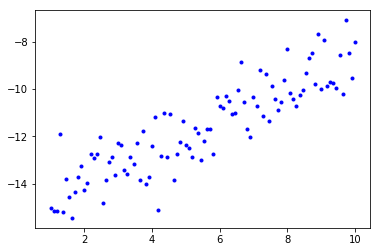

In [57]:
X = np.linspace(1, 10, 100)
Y = 0.7*X - 15.5 + np.random.randn(len(X))
plt.plot(X, Y , 'b.')

In [58]:
A = np.column_stack((X, np.ones_like(X)))
b = Y
A_p = np.linalg.pinv(A) #psevdo inverz
k, n = A_p @ b
print(k, n)

0.659240278648 -15.2415113738


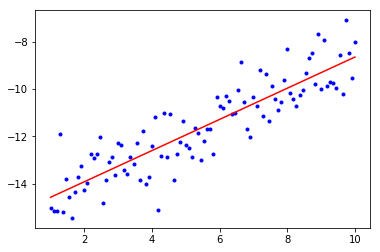

In [59]:
plt.plot(X, Y , 'b.')
plt.plot(X, k*X+n, 'r-')

# Iterativne metode - na teoriji lahko pride!!